In [9]:
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5694,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5695,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5696,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5697,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [25]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5699 entries, 5698 to 0
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      5699 non-null   datetime64[ns]
 1   [Australian dollar ]      5699 non-null   object        
 2   [Bulgarian lev ]          5297 non-null   object        
 3   [Brazilian real ]         5431 non-null   object        
 4   [Canadian dollar ]        5699 non-null   object        
 5   [Swiss franc ]            5699 non-null   object        
 6   [Chinese yuan renminbi ]  5431 non-null   object        
 7   [Cypriot pound ]          2346 non-null   object        
 8   [Czech koruna ]           5699 non-null   object        
 9   [Danish krone ]           5699 non-null   object        
 10  [Estonian kroon ]         3130 non-null   object        
 11  [UK pound sterling ]      5699 non-null   object        
 12  [Greek drachma ]    

In [15]:
exchange_rates.rename(columns={'[US dollar ]':'US_dollar', 'Period\\Unit:':'Time'}, inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)

In [19]:
euro_to_dollar = exchange_rates[['US_dollar', 'Time']].copy()

In [22]:
euro_to_dollar['US_dollar'].value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1268    6
1.3373    6
         ..
1.1458    1
0.8558    1
1.4195    1
1.3860    1
1.5748    1
Name: US_dollar, Length: 3527, dtype: int64

In [21]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']


In [24]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

In [29]:
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 5698 to 0
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   US_dollar     5637 non-null   float64       
 1   Time          5637 non-null   datetime64[ns]
 2   rolling_mean  5608 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 176.2 KB


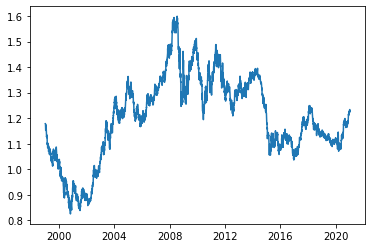

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(euro_to_dollar['Time'],  euro_to_dollar['US_dollar'])
plt.show()

In [28]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

### Financial crisis example 

We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.

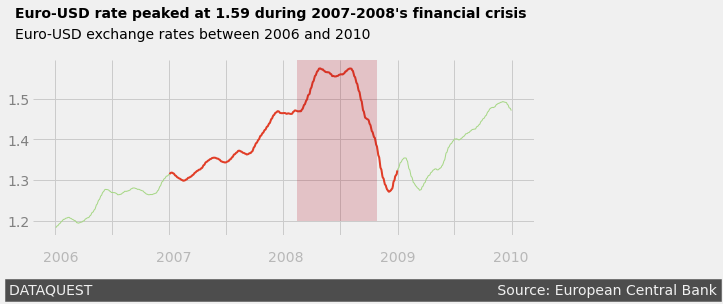

In [116]:
import matplotlib.style as style
style.use('fivethirtyeight')

financial_crisis = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2006) & (euro_to_dollar['Time'].dt.year <= 2009)]
financial_crisis_7_8 = euro_to_dollar.copy()[(euro_to_dollar['Time'].dt.year >= 2007) & (euro_to_dollar['Time'].dt.year <= 2008)]

fig, ax = plt.subplots(figsize=(8,3))

ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean'], linewidth=1, color='#A6D785')
ax.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['rolling_mean'], linewidth=2, color='#e23d28')


for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
    
ax.text(13020, 1.7, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", weight='bold')
ax.text(13020, 1.65, "Euro-USD exchange rates between 2006 and 2010")

ax.tick_params(axis='x', colors='grey')
ax.set_xticklabels([])
x = 13110
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.1, year, color='grey', alpha=0.5)
    x += 360

ax.tick_params(axis='y', colors='grey')


ax.axvline(x=14050, ymin=0.08, ymax=1, linewidth=80, color='#af0b1e', alpha=0.2)

ax.text(13000, 1.02, 'DATAQUEST' + ' '*90 + 'Source: European Central Bank', color='#f0f0f0', backgroundcolor='#4d4d4d')

plt.show()